In [ ]:
import sys; print(sys.prefix);print(sys.version)
import numpy as np
import matplotlib.pyplot as plt

# カスタム関数のimport
import importlib
import src.calc_rmse
importlib.reload(src.calc_rmse)
from src.calc_rmse import calc_rmse  # 再読み込み後に再import
from src.calc_tcr import calc_tcr  # 再読み込み後に再import

d:\Dropbox\sumi@labKyoto\WorkspaceCl\2025\Intern2_202505GaussProcess\Python\.venv
3.9.21 (main, Feb 12 2025, 14:46:31) [MSC v.1929 64 bit (AMD64)]


## ショートカットキーメモ: jupyter notebook の基本的な使い方

| ショートカットキー             | 機能             |
|-------------------------------|------------------|
| Ctrl + Enter                  | セルの実行       |
| Ctrl + /                      | コメントアウト    |
| Ctrl + Shift + minux          | セルの分割       |


# sickit-learnのデモコード

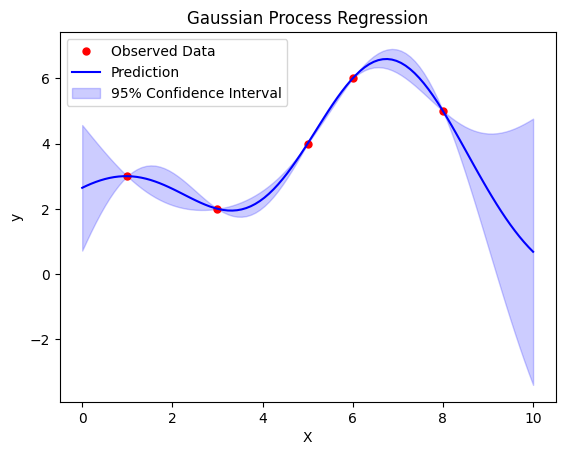

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# サンプルデータの生成
X = np.array([[1], [3], [5], [6], [8]])  # 入力データ
y = np.array([3, 2, 4, 6, 5])  # 出力データ

# Gaussian Processのカーネルを定義
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Gaussian Process Regressorの初期化
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# モデルの学習
gp.fit(X, y)

# 予測用データの生成
X_pred = np.linspace(0, 10, 100).reshape(-1, 1)

# 平均と標準偏差を予測
y_pred, sigma = gp.predict(X_pred, return_std=True)

# プロット
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observed Data')
plt.plot(X_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(
    X_pred.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.2,
    color='blue',
    label='95% Confidence Interval'
)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Gaussian Process Regression')
plt.show()

# GPy のサンプル


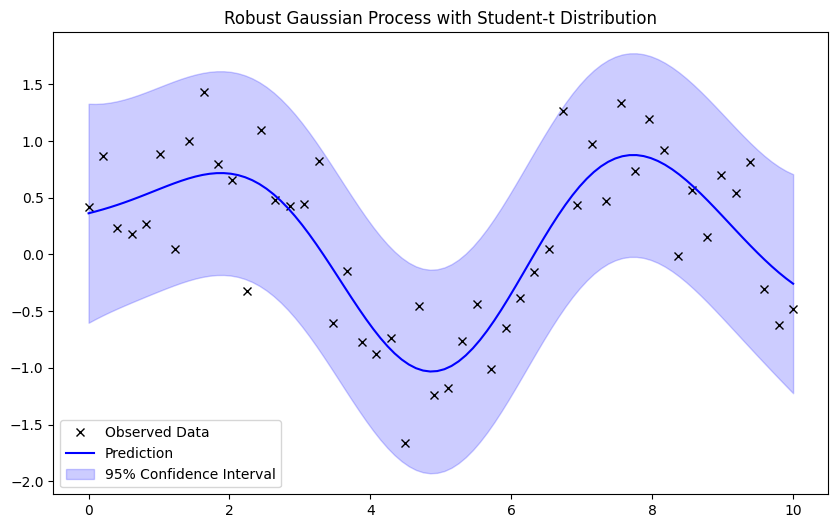

In [7]:

import numpy as np
import GPy

# サンプルデータの生成
X = np.linspace(0, 10, 50)[:, None]
y = np.sin(X) + np.random.normal(0, 0.5, X.shape)

# カーネルの定義
kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)

# Student-t 分布を考慮したガウス過程モデル
# GPy では標準で Student-t 分布をサポートしていないため、ロバストな尤度を使用
model = GPy.models.GPRegression(X, y, kernel)
# model.likelihood.variance.fix(1.0)  # 外れ値に強い設定

# モデルの最適化
model.optimize(messages=True)

# 予測
X_pred = np.linspace(0, 10, 100)[:, None]
y_pred, y_var = model.predict(X_pred)

# プロット
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'kx', label='Observed Data')
plt.plot(X_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(
    X_pred.flatten(),
    (y_pred - 1.96 * np.sqrt(y_var)).flatten(),
    (y_pred + 1.96 * np.sqrt(y_var)).flatten(),
    color='blue',
    alpha=0.2,
    label='95% Confidence Interval'
)
plt.legend()
plt.title('Robust Gaussian Process with Student-t Distribution')
plt.show()